# Chi Squared Model

http://ethen8181.github.io/machine-learning/text_classification/chisquare.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import chi2, SelectKBest, SelectPercentile
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
reviews = pd.read_csv("../Data/comments_preproc.csv").sample(n=50000, random_state=0)
reviews.dropna(subset=["cleanedComment"], inplace=True)
reviews.reset_index(drop=True, inplace=True)

In [3]:
cv = CountVectorizer()

X = reviews["cleanedComment"]
y = reviews["sentiment"]

y.value_counts()

1    36793
0    13206
Name: sentiment, dtype: int64

In [4]:
X_dtm = cv.fit_transform(X)
X_dtm = X_dtm.toarray()
#pd.DataFrame(X_dtm, columns=cv.get_feature_names_out())

In [5]:
#y_binarized = LabelBinarizer().fit_transform(y)
#print(y_binarized)
#print()

#observed = np.dot(y_binarized.T, X_dtm)
#print(observed)

In [6]:
#class_prob = y_binarized.mean(axis=0).reshape(1,-1)
#feature_count = X_dtm.sum(axis=0).reshape(1,-1)
#expected = np.dot(class_prob.T, feature_count)
#print(expected)

In [7]:
#chisq = (observed - expected) ** 2 / expected
#chisq_score = chisq.sum(axis=0)
#print(chisq_score)

In [8]:
#chi2score = chi2(X_dtm, y)
#chi2score

In [9]:
def graphPercentiles(X_new, y):
    percs = range(5, 31, 5)
    accs = []
    for p in percs:
        print("Starting loop iteration for top {0}%".format(p))
        percbest = SelectPercentile(score_func=chi2, percentile=p)
        X_percbest = percbest.fit_transform(X_new, y)
        print("\tDone selecting, fitting, and transforming percentile")

        X_train, X_test, y_train, y_test = train_test_split(X_percbest, y, test_size=0.2, stratify=y, random_state=1)        # split into training and testing subsets
    
        model = MultinomialNB().fit(X_train, y_train)           # create and fit model, use it to predict outcomes on test set
        print("\tDone fitting Naive Bayes")
        y_pred = model.predict(X_test)
        print("\tDone predicting")

        accs.append(accuracy_score(y_test, y_pred))
        print("Finished loop iteration for top {0}%\n".format(p))
    
    plt.scatter(percs, accs)
    plt.figure(figsize=(25,5))
    plt.show()

In [13]:
def graphSelections(X_new, y):
    ks = range(1000, 5001, 250)
    accs = []
    for k in ks:
        print("Starting loop iteration for top {0} features".format(k))
        percbest = SelectKBest(score_func=chi2, k=k)
        X_percbest = percbest.fit_transform(X_new, y)

        X_train, X_test, y_train, y_test = train_test_split(X_percbest, y, test_size=0.2, stratify=y, random_state=1)        # split into training and testing subsets
    
        model = MultinomialNB().fit(X_train, y_train)           # create and fit model, use it to predict outcomes on test set
        y_pred = model.predict(X_test)

        accs.append(accuracy_score(y_test, y_pred))
        print("Finished loop iteration for top {0} features".format(k))
    
    plt.scatter(ks, accs)
    plt.figure(figsize=(25,5))
    plt.show()

Starting loop iteration for top 5%
	Done selecting percentile
	Done fitting Naive Bayes
	Done predicting
Finished loop iteration for top 5%

Starting loop iteration for top 10%
	Done selecting percentile
	Done fitting Naive Bayes
	Done predicting
Finished loop iteration for top 10%

Starting loop iteration for top 15%
	Done selecting percentile
	Done fitting Naive Bayes
	Done predicting
Finished loop iteration for top 15%

Starting loop iteration for top 20%
	Done selecting percentile
	Done fitting Naive Bayes
	Done predicting
Finished loop iteration for top 20%

Starting loop iteration for top 25%
	Done selecting percentile
	Done fitting Naive Bayes
	Done predicting
Finished loop iteration for top 25%

Starting loop iteration for top 30%
	Done selecting percentile
	Done fitting Naive Bayes
	Done predicting
Finished loop iteration for top 30%



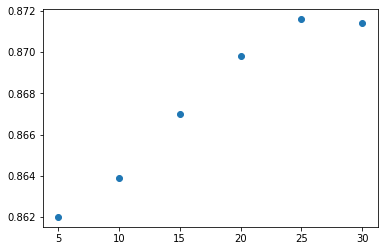

<Figure size 1800x360 with 0 Axes>

In [12]:
graphPercentiles(X_dtm, y)

In [14]:
graphSelections(X_dtm, y)

Starting loop iteration for top 1000 features
Finished loop iteration for top 1000 features
Starting loop iteration for top 1250 features
